In [2]:
#import needed libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#To have a colorful background on graphs
sns.set(color_codes=True)

In [3]:
#Importing the dataset file into the pandas Dataframe
data = pd.read_csv('CardioGoodFitness.csv')
#Getting size of the dataframe
cardio = data.copy()
print(cardio.shape)

(180, 9)


Dataset contains 180 rows and 9 columns

In [204]:
#Getting column names for re-usability
cardio.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Each column names represents the data and relationship between them

In [17]:
#Getting datatype info for each column
cardio['Fitness'] = cardio['Fitness'].astype('category')
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(1), int64(5), object(3)
memory usage: 11.7+ KB


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


Indeed, dataset contains 180 rows and 9 columns.

3 columns of dtype Object, hence Categorical/Qualitative Data =>  "Product, Gender, MaritalStatus". 

6 columns of dtype Integer, hence Discrete/Quantitative Data => "Age, Education, Usage, Ftness, Income, Miles"

In [206]:
#Revealing any values of NULL in a dataset
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Each columns contains zero null values. No preprocessing of dataset is needed. We can move on to deeper data analysis

In [5]:
#Get first 5 rows to look at actual data
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


head() function returns top 5 rows by default. Column values matches the description on the statement.

In [8]:
print("Mean of Usage : ", round(cardio.Usage.mean(), 2))
print("Median of Usage : ", round(cardio.Usage.median(), 2))
print("Mode of Usage : ", round(cardio.Usage.mode()[0], 2))

#Getting 5 exploratory points on quantitative data, in Transverse view(easier to read)
cardio.describe().T

Mean of Usage :  3.46
Median of Usage :  3.0
Mode of Usage :  3


,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


Age of customer ranges between 18 - 50, with 50th percentile of 26y.o. => age > 33 && age < 24 are the Outliers. 

Usage ranges between 1 - 7 days a week, with most frequent of 3 days. Since mean > medium => data is a bit right skewed, meaning there is more data with Outliers on higher numbers causing mean to be larger than median.

Self rated fitness where customer feels themselves between 1 - 5, is in average = 3.3 (mean)

Income average is a little over 50K

In [209]:
#Getting correlation between Quantitative data
cardio.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


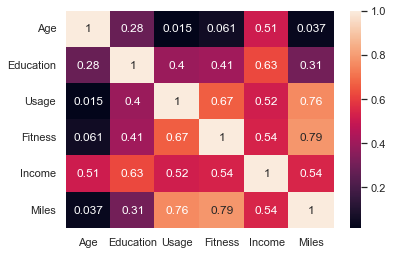

In [210]:
#Lets' look at the correlation on a graph
sns.heatmap(cardio.corr(), annot=True, color='red');
plt.show()

Data contains positive and negative correlations!

Age has a somewhat positive correlation on Income. However, has a strong negative correlation on Usage, Fitness, Miles columns, which makes sense since as we get older it's harder to keep up with the physical activities.

Education has a noticable correlation with Income. Higher the education - bigger the Income!

Usage has a good positive correlation with Fitness and Miles, as these columns are inter-related.

In [211]:
#Add Age_Group by binning up the Age column
cardio['Age_Group'] = pd.cut(cardio.Age, bins=[0, 18, 35, 60], labels=['Teenager', 'Young Adult', 'Late Adult'])

#Group by Age_Group to find the Usage mean
cardio.groupby('Age_Group')['Usage'].mean()

Age_Group
Teenager       3.000000
Young Adult    3.470199
Late Adult     3.392857
Name: Usage, dtype: float64

In [11]:
cardio.groupby('Fitness')['Usage'].agg({'sum', 'mean', 'std', 'count'})

,std,count,sum,mean
Fitness,,,,
1,0.707107,2,5,2.500000
2,0.646886,26,66,2.538462
3,0.745548,97,307,3.164948
4,0.928611,24,94,3.916667
5,1.003221,31,150,4.838710


Age group between 19-35 are the most attended group.

In [212]:
#Compare number of customers based on MaritalStatus
cardio.groupby('MaritalStatus')['Gender'].count()

MaritalStatus
Partnered    107
Single        73
Name: Gender, dtype: int64

Partnered customers buy more than singles!

In [213]:
#Aggregate self-rate with MaritalStatus and Gender
cardio.groupby(['MaritalStatus', 'Gender'])['Fitness'].agg({'mean', 'std', 'count'}).reset_index()

,MaritalStatus,Gender,std,mean,count
0,Partnered,Female,0.827370,3.065217,46
1,Partnered,Male,1.040177,3.426230,61
2,Single,Female,0.850287,2.966667,30
3,Single,Male,0.922825,3.651163,43


Aggregate customer Status with self-rate: 

STD seems to be ~ 1, while average ~ 3 of self-rate. This indicates the data is distributed around the mean.

In [214]:
#Aggregate Usage with MaritalStatus and Gender
cardio.groupby(['MaritalStatus', 'Gender'])['Usage'].agg({'mean', 'std', 'count'}).reset_index()

,MaritalStatus,Gender,std,mean,count
0,Partnered,Female,1.113813,3.217391,46
1,Partnered,Male,1.171380,3.622951,61
2,Single,Female,0.860366,3.133333,30
3,Single,Male,0.988864,3.697674,43


Aggregate customer Status with Usage: 

STD seems to be ~ 1, while average ~ 3.2 of Usage. This indicates the data is distributed around the mean.

In [215]:
cardio.groupby('Product')['Usage'].sum()

Product
TM195    247
TM498    184
TM798    191
Name: Usage, dtype: int64

There are 3 different group of products => "TM195, TM498, TM798".

TM195 => is the most popular product amongst the customers

# Visualization

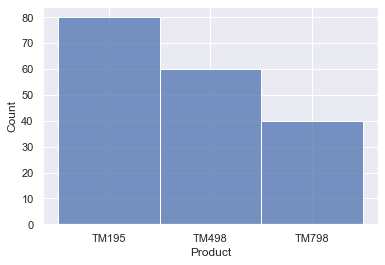

In [216]:
#Distribution of Product
sns.histplot(x='Product', data=cardio, kde=False);
plt.show()

TM195 is the most popular product

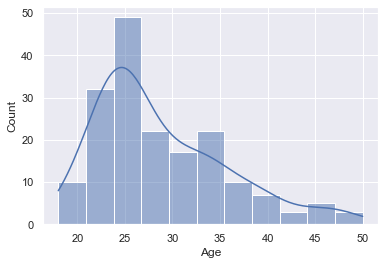

In [217]:
#Distribution on Age of the Customers
sns.histplot(x = 'Age', data=cardio, kde=True);
plt.show()

The Distribution of the Age is positively skewed, with a long right tail. We can notice that significant number of customers are in between 20-30.

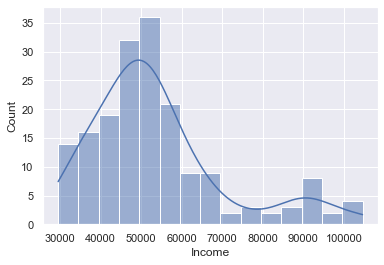

In [218]:
#Plot the Distribution of customer Income, which income class do they belong to
sns.histplot(x='Income', data=cardio, kde=True);
plt.show()

The min ~ 30K, max ~ 100K.

Data is right skewed, with mostly middle income class customers. 

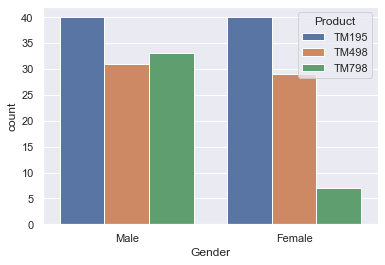

In [219]:
#To get the number on customer gender
sns.countplot(x='Gender', data=cardio, hue='Product');
plt.show()

It's obvious there are more Male customers, than female. And both genders prefer product=TM195

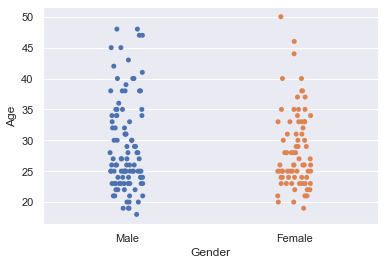

In [220]:
#Distribution on Age of the Customers with a gender
sns.stripplot(x = 'Gender', y = 'Age', data=cardio);
plt.show()

Each gender has an almost same result on age, so no difference on age group that could be visualized between genders.

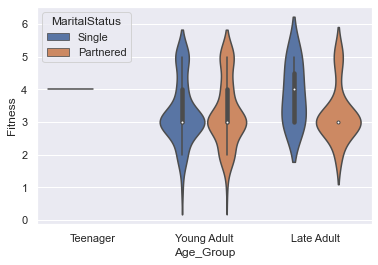

In [221]:
#Use violin plot to visualize how customers self-rate themselves against the age group grouped by marital status
sns.violinplot(x='Age_Group', y='Fitness', hue='MaritalStatus', data=cardio);
plt.show()

Significant customers are on Young_Adult group, with mean on medium self rate. Customers on Late Adult group has higher self-rate for Singles. 

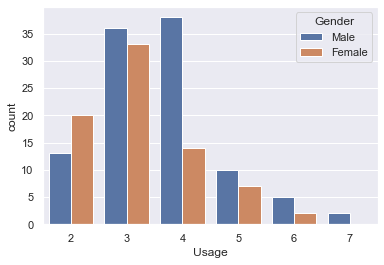

In [222]:
#To get the frequency distribuion on categorical data such as number of Usage among diff Genders
sns.countplot(x='Usage', hue='Gender', data=cardio);
plt.show()

Looks like Females prefer to workout 2-3 times a week with a peak on 3 days, while males has a peak on both 3 and 4 days of the week. 

Max days for females to use is 6, while for males it's all 7.

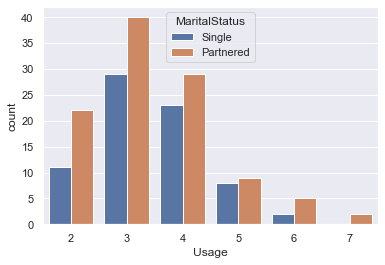

In [223]:
#Get a count of attendance fitness based on MaritalStatus
sns.countplot(x='Usage', hue='MaritalStatus', data=cardio);
plt.show()

It's obvious Partnered Individuals do use more often than singles to keep themselves on shape.

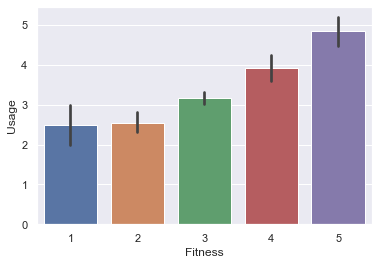

In [224]:
#Using barplot get number of self-rate against the Usage of fitness
sns.barplot(x='Fitness', y='Usage', data=cardio);
plt.show()

In the above graph, we can observe mean of Usage for each self-rate, along with the Coefficence Interval(error bar). 
We can notice a positive relationship between columns, which makes sense, as we feel good - we tend to workout. 

The most appreciative fact here, is the error bar being significantly smaller on self-rate of 3, which means customers has high certainty to use whenever they feel at the score of 3(medium fit).

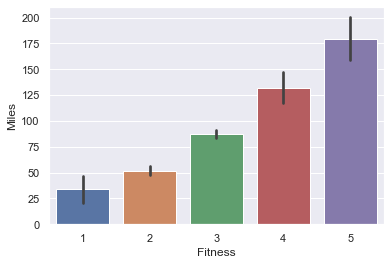

In [225]:
#Using barplot get number of self-rate against the Miles of fitness
sns.barplot(x='Fitness', y='Miles', data=cardio);
plt.show()

Definitely a positive relation, with the least error bar on self-rate of 2 and 3. The more customer feel fit, the more miles he can achieve.

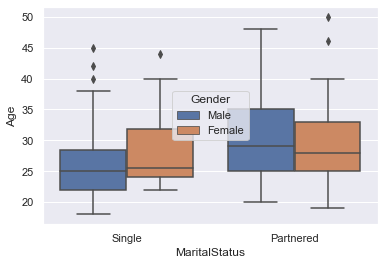

In [226]:
#Plot quantiles of Age between customers grouped by maritalstatus and gender
sns.boxplot(x='MaritalStatus', y='Age', data=cardio, hue='Gender');
plt.show()

Single Males seems to form a Normal Distribution as mean is right on the 50th percentile.

Single Females are right skewed, and contains older age customers

Partnered customers are of older age with longer whisker on Male customers

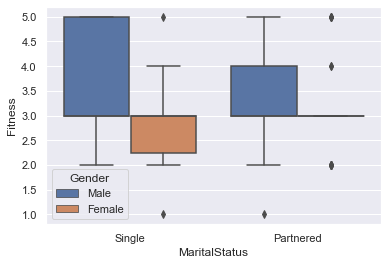

In [227]:
#Plot quantiles of Usage between customers grouped by maritalstatus and gender
sns.boxplot(x='MaritalStatus', y='Fitness', data=cardio, hue='Gender');
plt.show()

The mean for all groups of self-rate => is 3. There are Outliers on each group.

#  Relationship between columns!

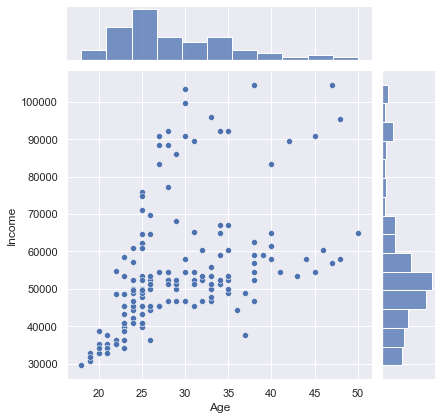

In [228]:
#Plot joining Age and Income
sns.jointplot(x='Age', y='Income', data=cardio);
plt.show()

There is a positive relationship between Age and Income. As older customer - bigger the Income is.

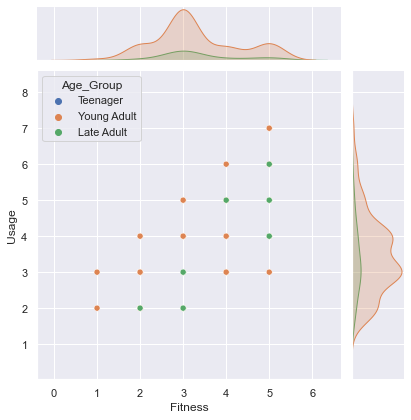

In [229]:
#Plot joining self-rate and Usage grouped by Age_Group
sns.jointplot(x='Fitness', y='Usage', data=cardio, hue='Age_Group');
plt.show()

We can observe, there is a positive correlation, as customer rate himself higher, then workouts more. Also it's the Young Adult group that uses the most.

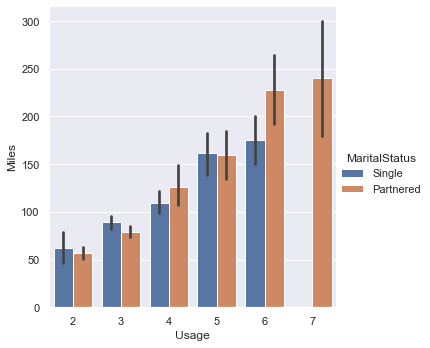

In [230]:
#CatPlot Usage with Miles group by MaritalStatus
sns.catplot(y='Miles', x='Usage', data=cardio, hue='MaritalStatus', kind='bar');

A def positive relation, as customers workout more the higher the Miles they run. It's obvious there is the least error bar on Usage of 3 days a week. Also to point out Partnered Customers workout every day of the week, whereas max day for singles is 6 days.

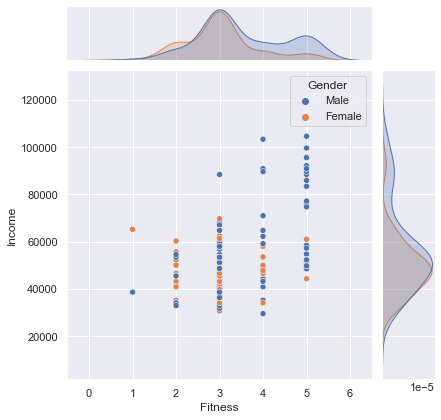

In [231]:
#Plot relationship between self-rate and Income on grouping by gender
sns.jointplot(x='Fitness', y='Income', data=cardio, hue='Gender');
plt.show()

There is a positive correlation. on mean Income (~50K) there is significant amount of customers self-rating at 3,
with a mix of males and females. The higher self-rate the higher the Income with mostly males.

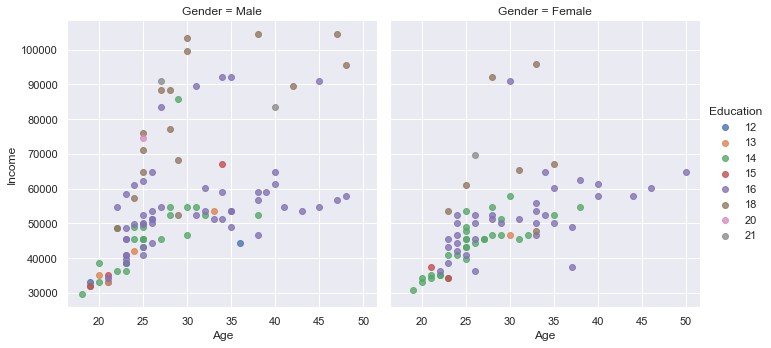

In [232]:
#To visualize the Linear model based on gender between Age and Miles
sns.lmplot(x='Age', y='Income', data=cardio, hue='Education', col='Gender', fit_reg=False);
plt.show()

We observe a positive relation on Age and Income. Education mean = 16, which we can observe as the most of the customers
has a 16 years of education, with a little less of 12 years. Males has more Outliers with more years of education, than females.

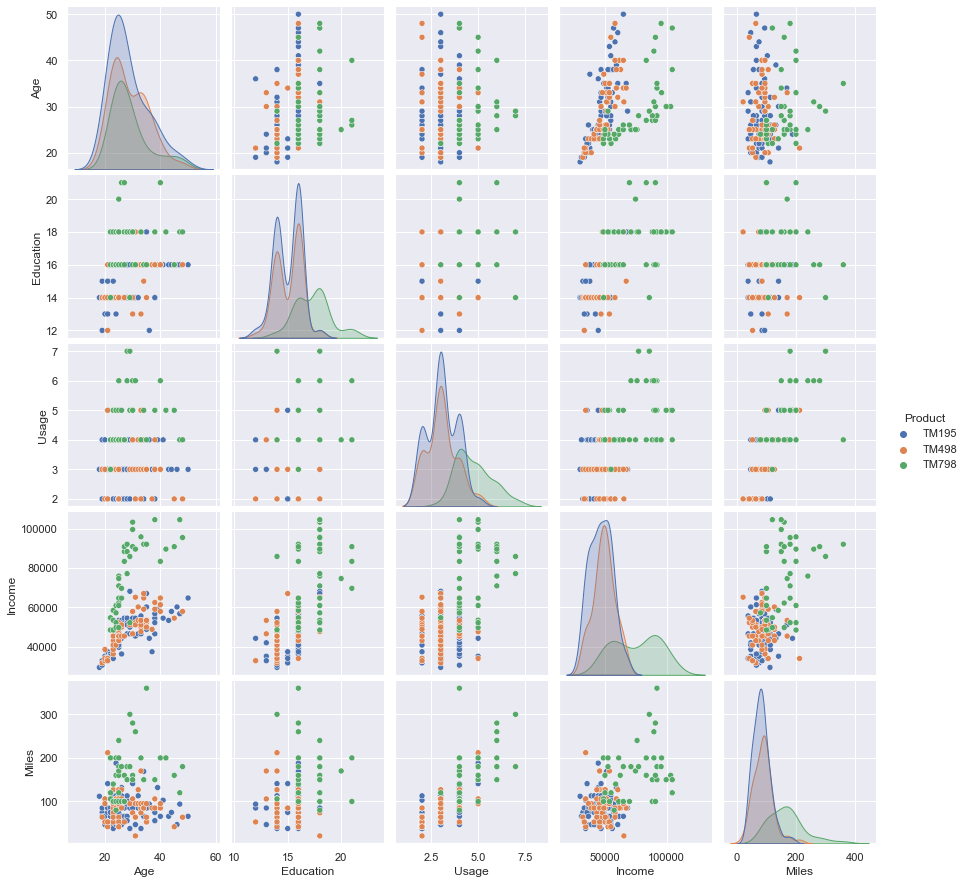

In [12]:
#Use pairplot to get the full picture of relationship between quantitative columns
sns.pairplot(data=cardio, hue='Product');
plt.show()

All above noted correlations meet the expectations as shown on the pairplot results!

# Conclusion


Based on the provided dataset, store contains 3 group of products that customers utilize. Customers are described based on Age, MaritalStatus, Gender, Education, Income, Miles and Fitness(self-rating). 

TM195 is the most popular product among the customers, so it would be advisable to have more machines with that model to have it available for more customers. TM798 seems to be pretty popular for males, but not females. Could be it's too powerful and harder to utilize. Product should be adjusted/switched to be flexible and easier to use, since it's the least on demand.

Based on dataset, looks like the spike on Usage on average is for 3 days a week which seems to be dependent on Fitness self-rate of the customers. To achieve a bigger urge to workout, maybe shop could organize a commercial showing non-fit people using the product. This could encourage customers to achieve bigger results in Miles as they tend to Use more than 3 days a week. And also attract low self-rate, non-fit people more to the store to buy the product.

Customers with a higher self-rate, bigger Income, higher Education and older in Age tends to use the products more often. Shop should attract employees/professionals of big organizations to attract more potential customers.

Partnered Customers are the most popular at the store. Since, they tend to own a house and it makes sense to utilize the machines at the house, rather than attending the gym. 